# Notebook Regresion Lineal 1 Reto: Interlub
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)


## Instrucciones:
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Procure NO usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor
- Active el kernel proveniente de `Anaconda`
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Prohibido usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor



In [1]:
# cargar librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import pandas as pd

# 0. Datos disponibles

 Cargar los datos como pandas data frame

In [2]:
df = pd.read_csv('data/datos_grasas_Tec_limpio.csv')

Dele un vistazo a los datos (tambien abralos en excel)

In [3]:
def glimpse(df):
    """
    completar documentacion
    """
    print("Data Types:")
    print(df.dtypes)
    print("\nShape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())


# llame a la funcion
glimpse(df)


Data Types:
idDatosGrasas                                 int64
codigoGrasa                                  object
Aceite Base                                  object
Espesante                                    object
Grado NLGI Consistencia                     float64
Viscosidad del Aceite Base a 40°C. cSt      float64
Penetración de Cono a 25°C, 0.1mm           float64
Punto de Gota, °C                             int64
Estabilidad Mecánica, %                     float64
Punto de Soldadura Cuatro Bolas, kgf        float64
Desgaste Cuatro Bolas, mm                   float64
Indice de Carga-Desgaste                    float64
Carga Timken Ok, lb                         float64
Resistencia al Lavado por Agua a 80°C, %    float64
Corrosión al Cobre                           object
Registro NSF                                float64
Factor de Velocidad                         float64
Temperatura de Servicio °C, min               int64
Temperatura de Servicio °C, max               int64


## 1. Procesamiento de datos

### 1.1. Quitar columnas que no necesitamos
*Ejercicio:* Analice que columnas va a quitar, anote una justificación clara de por que esta quitando estas columnas

In [4]:
df_reduced = df.drop(columns=['codigoGrasa', 'subtitulo','descripcion','aplicaciones','categoria','idDatosGrasas','Corrosión al Cobre', 'Indice de Carga-Desgaste'],axis=1)

#### Justificar el por que nos desahacemos de una columna
- Motivo por que eliminar "codigoGrasa"

Esta columna funciona únicamente como identificador único del producto, no aporta información numérica ni categórica útil para la predicción.

- Motivo por qué eliminar "idDatosGrasas"

Es otra columna que actúa como ID interno de la base de datos, sin significado químico, técnico o predictivo.

- Motivo por qué eliminar "descripcion"

Contiene texto descriptivo largo y no estructurado.

No está estandarizado, por lo que introduce ruido semántico.


- Motivo por qué eliminar "categoria"

Es una etiqueta amplia y poco específica.

No describe directamente el comportamiento químico ni el desempeño del lubricante.

- Motivo por qué eliminar "subtitulo"

Contiene texto libre no estandarizado.

No aporta información numérica o categórica estructurada.

- Motivo por qué eliminar "descripcion"

Es un texto largo, descriptivo y subjetivo.

No está normalizado y tiene alta variabilidad semántica.

- Motivo por qué eliminar "beneficios"

Texto cualitativo sin estructura.

No aporta valores medibles relacionados con la temperatura o desempeño.

- Motivo por qué eliminar "aplicaciones"

Contiene descripciones generales del uso (e.g., “automotriz”, “industrial”).

No representa una característica físico-química del producto.


### 1.2. Definir una funcion para mapear las variables categoricas
*Ejercicio*: Complete la función de tal manera que genere etiquetas del 0 a $n$ (donde $n$) es el numero de diferentes variables

In [5]:
def encoder_categorical(df_reduced, column_name):
    """
    completar documentacion
    """
    unique_values = df_reduced[column_name].unique()
    print(unique_values, type(unique_values))
    i = 0
    for name in unique_values:
        if name is np.nan:
            rep = -99
        else:
            rep = i
            i += 1
        df_reduced[column_name] = df_reduced[column_name].replace(name, rep)

In [6]:
encoder_categorical(df_reduced, "Aceite Base")
encoder_categorical(df_reduced, "color")
encoder_categorical(df_reduced, "Espesante")
encoder_categorical(df_reduced, "textura")

['Semi-Sintetico' 'Mineral HT' 'Mineral Refinado' 'Mineral' nan
 'Mineral USP' 'Mineral HC'] <class 'numpy.ndarray'>
['CafÃ©' 'Negro' 'Ambar' 'CafÃ© Claro' 'Beige' 'Blanco' 'Beige Claro'
 'Cristalino'] <class 'numpy.ndarray'>
['Complejo Sulfonato de Calcio' 'Complejo de Aluminio - Poliurea'
 'Complejo de Aluminio' nan 'Silica' 'Complejo de Litio'
 'Complejo de Poliurea' 'Bentonita'] <class 'numpy.ndarray'>
['Suave' 'Adherente' 'Suave Adhesiva' 'Viscosa adherente'
 'Suave Adherente'] <class 'numpy.ndarray'>


C:\Users\danis\AppData\Local\Temp\ipykernel_32868\2524458924.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reduced[column_name] = df_reduced[column_name].replace(name, rep)


In [7]:
df_reduced.head()

,Aceite Base,Espesante,Grado NLGI Consistencia,Viscosidad del Aceite Base a 40°C. cSt,"Penetración de Cono a 25°C, 0.1mm","Punto de Gota, °C","Estabilidad Mecánica, %","Punto de Soldadura Cuatro Bolas, kgf","Desgaste Cuatro Bolas, mm","Carga Timken Ok, lb","Resistencia al Lavado por Agua a 80°C, %",Registro NSF,Factor de Velocidad,"Temperatura de Servicio °C, min","Temperatura de Servicio °C, max",beneficios,color,textura
0,0,0,2.0,680.0,279.0,304,1.07,500.0,NaN,60.0,0.58,NaN,200000.0,5,220,Excelentes caracterÃ­sticas de resistencia al ...,0,0
1,1,0,1.5,460.0,300.0,304,2.60,900.0,0.50,70.0,3.00,NaN,300000.0,-30,150,Extremo soporte de carga.\r\n@Alto contenido d...,1,1
2,1,0,2.0,460.0,280.0,300,10.00,500.0,0.48,NaN,3.00,NaN,NaN,-10,150,Extremo soporte de carga.\r\n@Alto contenido d...,1,1
3,1,0,2.0,220.0,280.5,300,5.00,500.0,0.45,NaN,3.00,NaN,NaN,-15,150,Alta estabilidad tÃ©rmica y anti-oxidante.\r\n...,2,0
4,1,1,1.5,680.0,295.0,260,6.50,620.0,0.48,50.0,1.45,NaN,NaN,-5,150,Excelente soporte de carga extrema.\r\n@Excele...,1,1


### 1.3 Pasos finales
- Llenar de -99 donde no hayan registros
- Guardar en archivo csv


In [10]:
df_reduced = df_reduced.fillna(-99)
df_reduced.to_csv("transformed_data_interlub_2.csv")


In [11]:
df_reduced = pd.read_csv('transformed_data_interlub_2.csv')

# 2. Generar datos
*Ejercicio:* comprenda, complete y documente la siguiente funcion, el profesor le va apoyar

In [12]:

def _to_num(x):
    """Convierte en float si es posible (maneja objetos/strings)."""
    v = pd.to_numeric(x, errors='coerce')
    return v

def simular_datos(df_original, n_nuevos=50):
    """
    Genera registros simulados a partir de un DataFrame base.

    Reglas:
    - Mantiene -99 como faltante.
    - Categóricas: se mantienen igual.
    - Numéricas: pequeñas variaciones porcentuales por variable.
    - Ints (p.ej. temperaturas, códigos mapeados): se redondean y castean a int.
    """
    nuevos_datos = []

    # set para castear a int (según tus dtypes)
    cols_int = {
        'Aceite Base', 'Espesante', 'Temperatura de Servicio °C, min',
        'Temperatura de Servicio °C, max', 'color', 'textura'
    }

    for i in range(n_nuevos):
        grasa_base = df_original.iloc[np.random.randint(0, len(df_original))]
        nuevo_id = len(df_original) + i
        nuevo_registro = {}

        for col in df_original.columns:
            if col == '':  # mandamos a volar el indice (obvio)
                continue

            valor_base = grasa_base[col]

            # normalizamos: si viene como string numérica, la convertimos
            vb_num = _to_num(valor_base)
            if (isinstance(valor_base, (int, float, np.integer, np.floating)) and valor_base == -99) or \
               (pd.isna(vb_num)):
                # si -99 o no convertible, mantenemos -99
                nuevo_registro[col] = -99
                continue

            # variables categóricas (mapeadas a int en tu df)
            if col in ['Aceite Base', 'Espesante', 'color', 'textura', 'beneficios']:
                # beneficios lo tratamos como categórica: lo dejamos igual
                nuevo_registro[col] = valor_base

            elif col in ['Grado NLGI Consistencia']:
                # NLGI posibles valores
                nlgi_opciones = [0, 1, 1.5, 2, 2.5, 3]
                nuevo_registro[col] = np.random.choice(nlgi_opciones)

            elif col in ['Viscosidad del Aceite Base a 40°C. cSt']:
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.85, 1.15)

            elif col in ['Penetración de Cono a 25°C, 0.1mm']:
                # variación ±5%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.95, 1.05)

            elif col in ['Punto de Gota, °C']:
                # variación ±3%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.97, 1.03)

            elif col in ['Estabilidad Mecánica, %']:
                # variación ±6% y no negativa
                val = float(vb_num) * np.random.uniform(0.94, 1.06)
                nuevo_registro[col] = max(val, 0)

            elif col in ['Punto de Soldadura Cuatro Bolas, kgf']:
                # variación ±10%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.90, 1.10)

            elif col in ['Desgaste Cuatro Bolas, mm']:
                # variación ±5% y no negativa
                val = float(vb_num) * np.random.uniform(0.95, 1.05)
                nuevo_registro[col] = max(val, 0)

            elif col in ['Carga Timken Ok, lb']:
                # variación ±10% y no negativa
                val = float(vb_num) * np.random.uniform(0.90, 1.10)
                nuevo_registro[col] = max(val, 0)

            elif col in ['Resistencia al Lavado por Agua a 80°C, %']:
                # variación ±8% y no negativa
                val = float(vb_num) * np.random.uniform(0.92, 1.08)
                nuevo_registro[col] = max(val, 0)

            elif col in ['Factor de Velocidad']:
                # variación ±8%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.92, 1.08)

            elif col in ['Temperatura de Servicio °C, min']:
                # variación ±4%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.96, 1.04)

            elif col in ['Temperatura de Servicio °C, max']:
                # variación ±4%
                nuevo_registro[col] = float(vb_num) * np.random.uniform(0.96, 1.04)

            elif col in ['Registro NSF']:
                # algunos como -99 (faltantes)
                if np.random.random() < 0.7:
                    nuevo_registro[col] = -99
                else:
                    nuevo_registro[col] = np.random.uniform(100000, 200000)

            else:
                # por defecto, lo dejamos igual
                nuevo_registro[col] = valor_base

        # post-procesado: ints y coherencia min/max
        for c in cols_int:
            if c in nuevo_registro and nuevo_registro[c] != -99:
                # redondeo seguro
                try:
                    nuevo_registro[c] = int(round(float(_to_num(nuevo_registro[c]))))
                except Exception:
                    nuevo_registro[c] = -99

        # asegurar que min <= max si ambos existen y no son -99
        if ('Temperatura de Servicio °C, min' in nuevo_registro and
            'Temperatura de Servicio °C, max' in nuevo_registro):
            tmin = nuevo_registro['Temperatura de Servicio °C, min']
            tmax = nuevo_registro['Temperatura de Servicio °C, max']
            if tmin != -99 and tmax != -99 and tmin > tmax:
                # intercambiamos para mantener consistencia
                nuevo_registro['Temperatura de Servicio °C, min'], \
                nuevo_registro['Temperatura de Servicio °C, max'] = tmax, tmin

        nuevos_datos.append(nuevo_registro)

    return pd.DataFrame(nuevos_datos)

### 2.1 Llamar a la funcion 

In [13]:
df_reduced_numer =  df_reduced.select_dtypes(include=[np.number])
# glimpse(df_reduced)
expanded_data = simular_datos(df_reduced_numer, n_nuevos=1000)

# dele un vistazo a los datos
glimpse(expanded_data)
# guarde los datos en un archivo csv
expanded_data.to_csv("simulated_data_interlub.csv", index=False)

Data Types:
Unnamed: 0                                  float64
Aceite Base                                   int64
Espesante                                     int64
Grado NLGI Consistencia                     float64
Viscosidad del Aceite Base a 40°C. cSt      float64
Penetración de Cono a 25°C, 0.1mm           float64
Punto de Gota, °C                           float64
Estabilidad Mecánica, %                     float64
Punto de Soldadura Cuatro Bolas, kgf        float64
Desgaste Cuatro Bolas, mm                   float64
Carga Timken Ok, lb                         float64
Resistencia al Lavado por Agua a 80°C, %    float64
Registro NSF                                float64
Factor de Velocidad                         float64
Temperatura de Servicio °C, min               int64
Temperatura de Servicio °C, max               int64
color                                         int64
textura                                       int64
dtype: object

Shape: (1000, 18)

First few rows:
  

# 3. Regresión lineal

### 3.1 Variables en el modelo (y, X)
*Ejercicio:* Analice y entienda el uso de la siguiente funcion, documentela adecuadamente.


In [14]:

def variables_regresion(df, variable_objetivo, variables_predictoras):
    """
    completar documentacion
    """
    
    # quedarnos solo con las filas completas
    df_filtrado = df.copy()
    for var in variables_predictoras + [variable_objetivo]:
        df_filtrado = df_filtrado[df_filtrado[var] != -99]
    
    X = df_filtrado[variables_predictoras]
    y = df_filtrado[variable_objetivo]
    
    return X, y

### 3.2 Definir el modelo

*Ejercicio:* complete y comente las siguientes lineas de codigo

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

def modelo_regresion_lineal(variable_objetivo, variables_predictoras):

    expanded_data = pd.read_csv('simulated_data_interlub.csv')

    target_cols = variable_objetivo      # e.g. ['Temperatura de Servicio °C, max']
    feature_cols = variables_predictoras # e.g. lista de 5 features numéricas

    # subset de columnas
    data_sub = expanded_data[target_cols + feature_cols].copy()

    # asegurar numérico
    for col in data_sub.columns:
        data_sub[col] = pd.to_numeric(data_sub[col], errors='coerce')

    X = data_sub[feature_cols]
    y = data_sub[target_cols[0]]  # una sola variable objetivo

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.1,
        random_state=42
    )

    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ])

    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("MSE train:", mse_train)
    print("MSE test:", mse_test)
    print("R² train:", r2_train)
    print("R² test:", r2_test)

    return {
        "modelo": pipe,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "mse_train": mse_train,
        "mse_test": mse_test,
        "r2_train": r2_train,
        "r2_test": r2_test
    }


In [16]:
v1 = ['Temperatura de Servicio °C, max']
v2 = ['Viscosidad del Aceite Base a 40°C. cSt', 'Penetración de Cono a 25°C, 0.1mm',
                            'Punto de Gota, °C', 'Punto de Soldadura Cuatro Bolas, kgf',
                            'Grado NLGI Consistencia']

resultados = modelo_regresion_lineal(v1, v2)

MSE train: 765.1071842166947
MSE test: 927.5046639794041
R² train: 0.20187672205050922
R² test: 0.22565982302604415


### 3.2 Grafica de resultados

*Ejercicio:* analice e interprete la grafica resultante

In [17]:
def plot_regression_results(y_train, y_pred_train):
    # convertir a arrays 1D por si vienen como Series
    y_real = np.array(y_train).ravel()
    y_pred = np.array(y_pred_train).ravel()
        
    # línea de regresión para las predicciones
    z = np.polyfit(y_real, y_pred, 1)
    p = np.poly1d(z)
        
    plt.figure(figsize=(6, 6))
    plt.scatter(y_real, y_pred, alpha=0.6, s=50)
    plt.plot(y_real, p(y_real), "r--", alpha=0.8, linewidth=2, 
             label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
        
    plt.plot([y_real.min(), y_real.max()], 
             [y_real.min(), y_real.max()], 
             'g-', alpha=0.5, linewidth=2, label='descrip perfecta')
        
    plt.xlabel('Temperatura Real (°C)')
    plt.ylabel('Temperatura Predicha (°C)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

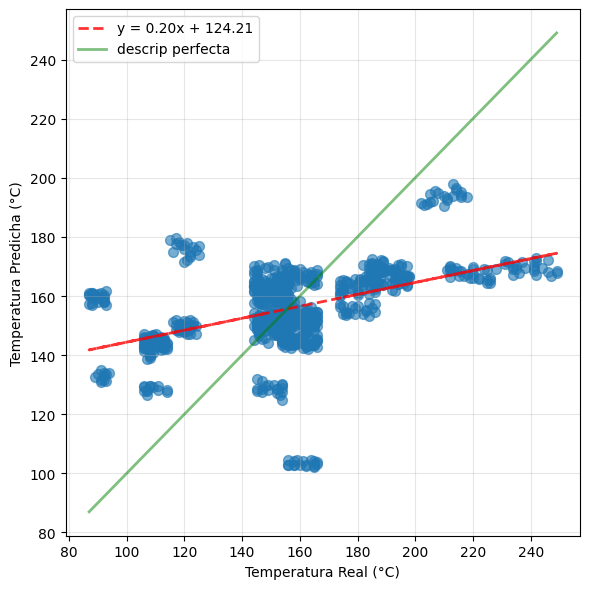

In [18]:
plot_regression_results(resultados["y_train"], resultados["y_pred_train"])

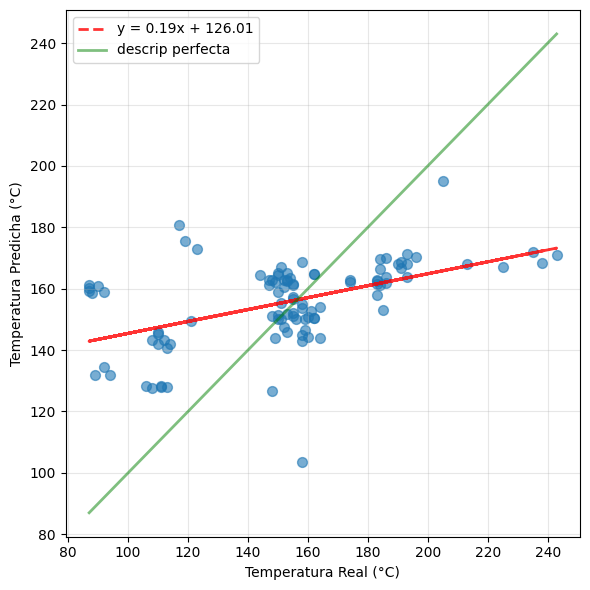

In [19]:
plot_regression_results(resultados["y_test"], resultados["y_pred_test"])

# 4. Ejercicios: mejorar la regresion lineal

- Para la simulacion, intente distintas variaciones de sus datos simulados, dé una variacion informada (educada)
- Para la regresion lineal, pruebe varias combinaciones de variables objetivos
- Haga una regresion linea con las mismas variables, pero solo usando datos originales (sin simulacion)
- Compare sus resultados de los dos puntos anteriores
- Esta es el primer contacto de como simular datos apartir de una base de datos chica, vaya pensando como puede mejorar esta simulacion


In [20]:
#Mejorar el modelo
def modelo_regresion_lineal_df(df_base, variable_objetivo, variables_predictoras, nombre_experimento=""):
    """
    Ajusta un modelo de regresión lineal a partir de un DataFrame dado.

    Parámetros
    ----------
    df_base : pd.DataFrame
        DataFrame que contiene todas las columnas necesarias.
    variable_objetivo : list
        Lista con una sola cadena: nombre de la columna objetivo (y).
    variables_predictoras : list
        Lista de cadenas con las columnas predictoras (X).
    nombre_experimento : str
        Etiqueta para identificar este ajuste (ej. 'Sim 1', 'Original').

    Regresa
    -------
    dict
        Diccionario con el modelo entrenado, predicciones y métricas.
    """
    target_cols = variable_objetivo
    feature_cols = variables_predictoras

    # Nos quedamos solo con las columnas necesarias
    data_sub = df_base[target_cols + feature_cols].copy()

    # Interpretamos -99 como "faltante" y lo pasamos a NaN
    data_sub = data_sub.replace(-99, np.nan)

    # Aseguramos valores numéricos (por si hay strings)
    for col in data_sub.columns:
        data_sub[col] = pd.to_numeric(data_sub[col], errors='coerce')

    # Eliminamos filas donde la variable objetivo no exista
    data_sub = data_sub.dropna(subset=[target_cols[0]])

    X = data_sub[feature_cols]
    y = data_sub[target_cols[0]]

    # Conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.1,
        random_state=42
    )

    # Pipeline: imputación + escalado + regresión lineal
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ])

    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n=== {nombre_experimento} ===")
    print("MSE train:", mse_train)
    print("MSE test :", mse_test)
    print("R² train :", r2_train)
    print("R² test  :", r2_test)

    return {
        "nombre": nombre_experimento,
        "modelo": pipe,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "mse_train": mse_train,
        "mse_test": mse_test,
        "r2_train": r2_train,
        "r2_test": r2_test
    }

In [21]:
# 4.1 Distintas simulaciones "educadas"

# Base numérica original
df_base_numerica = df_reduced_numer.copy()

# Generamos varias simulaciones (puedes cambiar n_nuevos)
sim1 = simular_datos(df_base_numerica, n_nuevos=500)
sim2 = simular_datos(df_base_numerica, n_nuevos=500)
sim3 = simular_datos(df_base_numerica, n_nuevos=500)

v1 = ['Temperatura de Servicio °C, max']
v2 = ['Viscosidad del Aceite Base a 40°C. cSt',
      'Penetración de Cono a 25°C, 0.1mm',
      'Punto de Gota, °C',
      'Punto de Soldadura Cuatro Bolas, kgf',
      'Grado NLGI Consistencia']

res_sim1 = modelo_regresion_lineal_df(sim1, v1, v2, nombre_experimento="Simulación 1")
res_sim2 = modelo_regresion_lineal_df(sim2, v1, v2, nombre_experimento="Simulación 2")
res_sim3 = modelo_regresion_lineal_df(sim3, v1, v2, nombre_experimento="Simulación 3")

# Resumen en tabla
resumen_sim = pd.DataFrame([
    {
        "Experimento": r["nombre"],
        "MSE_train": r["mse_train"],
        "MSE_test": r["mse_test"],
        "R2_train": r["r2_train"],
        "R2_test": r["r2_test"],
    }
    for r in [res_sim1, res_sim2, res_sim3]
])

resumen_sim


=== Simulación 1 ===
MSE train: 711.2967904822085
MSE test : 756.1275838224641
R² train : 0.23614401837319976
R² test  : 0.12760240540067902

=== Simulación 2 ===
MSE train: 775.706359039365
MSE test : 558.4623365568646
R² train : 0.23170494138431375
R² test  : 0.3512576384175422

=== Simulación 3 ===
MSE train: 699.8244662471923
MSE test : 1054.8847682203623
R² train : 0.21818101915693955
R² test  : 0.047975397159135125


,Experimento,MSE_train,MSE_test,R2_train,R2_test
0,Simulación 1,711.296790,756.127584,0.236144,0.127602
1,Simulación 2,775.706359,558.462337,0.231705,0.351258
2,Simulación 3,699.824466,1054.884768,0.218181,0.047975


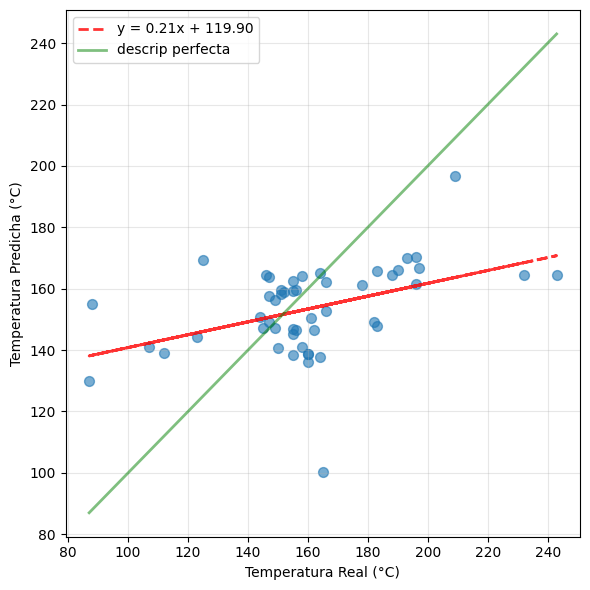

In [22]:
plot_regression_results(res_sim1["y_test"], res_sim1["y_pred_test"])

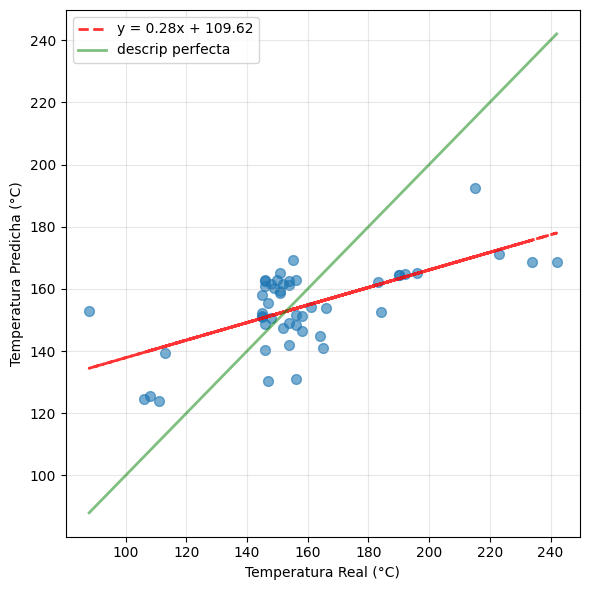

In [23]:
plot_regression_results(res_sim2["y_test"], res_sim2["y_pred_test"])

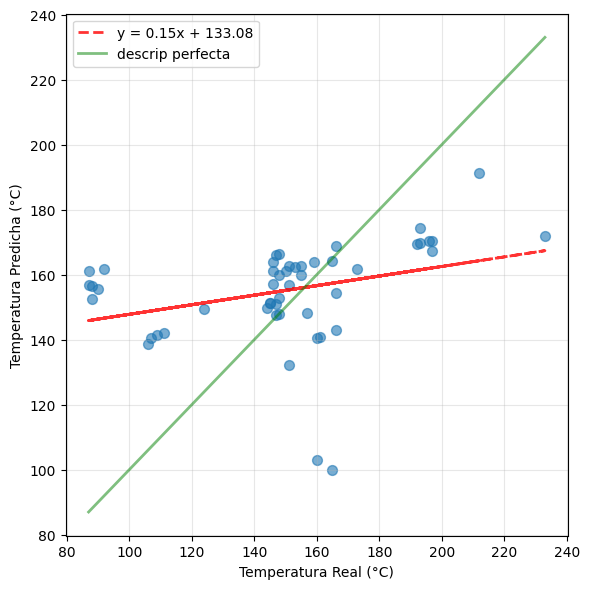

In [24]:
plot_regression_results(res_sim3["y_test"], res_sim3["y_pred_test"])

In [25]:
# 4.2 Varias combinaciones de variable objetivo (y)

expanded_data = sim1  # por ejemplo, usamos la simulación 1

configs_objetivo = [
    ("Y = Temp Servicio MAX",
     ['Temperatura de Servicio °C, max'],
     ['Viscosidad del Aceite Base a 40°C. cSt',
      'Penetración de Cono a 25°C, 0.1mm',
      'Punto de Gota, °C',
      'Punto de Soldadura Cuatro Bolas, kgf',
      'Grado NLGI Consistencia']),
    
    ("Y = Temp Servicio MIN",
     ['Temperatura de Servicio °C, min'],
     ['Viscosidad del Aceite Base a 40°C. cSt',
      'Penetración de Cono a 25°C, 0.1mm',
      'Punto de Gota, °C',
      'Punto de Soldadura Cuatro Bolas, kgf',
      'Grado NLGI Consistencia']),
    
    ("Y = Viscosidad 40°C",
     ['Viscosidad del Aceite Base a 40°C. cSt'],
     ['Penetración de Cono a 25°C, 0.1mm',
      'Punto de Gota, °C',
      'Punto de Soldadura Cuatro Bolas, kgf',
      'Grado NLGI Consistencia'])
]

resultados_obj = []
for nombre_exp, y_cols, x_cols in configs_objetivo:
    res = modelo_regresion_lineal_df(expanded_data, y_cols, x_cols, nombre_experimento=nombre_exp)
    resultados_obj.append(res)

resumen_obj = pd.DataFrame([
    {
        "Experimento": r["nombre"],
        "MSE_train": r["mse_train"],
        "MSE_test": r["mse_test"],
        "R2_train": r["r2_train"],
        "R2_test": r["r2_test"],
    }
    for r in resultados_obj
])

resumen_obj


=== Y = Temp Servicio MAX ===
MSE train: 711.2967904822085
MSE test : 756.1275838224641
R² train : 0.23614401837319976
R² test  : 0.12760240540067902

=== Y = Temp Servicio MIN ===
MSE train: 64.75971860718163
MSE test : 53.78008949342232
R² train : 0.18641353791109005
R² test  : -0.119709381837801

=== Y = Viscosidad 40°C ===
MSE train: 441527.26938419003
MSE test : 548215.8106738224
R² train : 0.16392098590348514
R² test  : 0.16743992862928303


,Experimento,MSE_train,MSE_test,R2_train,R2_test
0,Y = Temp Servicio MAX,711.296790,756.127584,0.236144,0.127602
1,Y = Temp Servicio MIN,64.759719,53.780089,0.186414,-0.119709
2,Y = Viscosidad 40°C,441527.269384,548215.810674,0.163921,0.167440



=== Datos originales ===
MSE train: 761.3649770322943
MSE test : 546.635695893994
R² train : 0.175703550849874
R² test  : 0.512898884846936


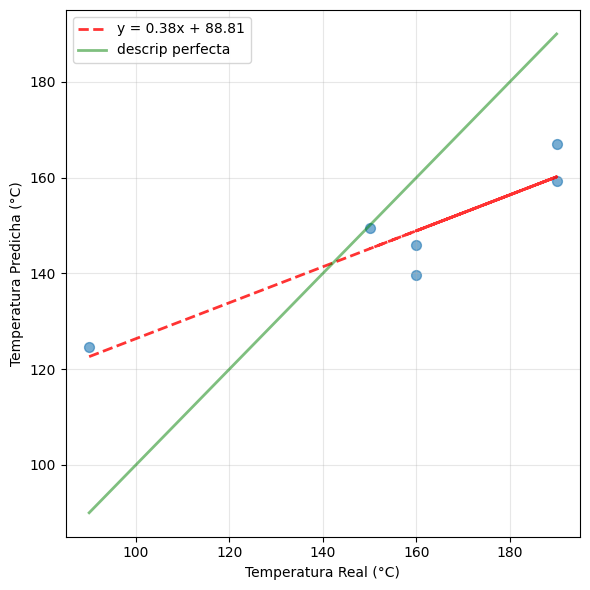

In [26]:
# 4.3 Misma configuración de variables pero con datos ORIGINALES

res_original = modelo_regresion_lineal_df(
    df_reduced_numer,
    v1,
    v2,
    nombre_experimento="Datos originales"
)

# Podemos ver la gráfica para el conjunto de prueba
plot_regression_results(res_original["y_test"], res_original["y_pred_test"])

In [27]:
comparacion = pd.DataFrame([
    {
        "Experimento": res_sim1["nombre"],
        "MSE_train": res_sim1["mse_train"],
        "MSE_test": res_sim1["mse_test"],
        "R2_train": res_sim1["r2_train"],
        "R2_test": res_sim1["r2_test"],
    },
    {
        "Experimento": res_original["nombre"],
        "MSE_train": res_original["mse_train"],
        "MSE_test": res_original["mse_test"],
        "R2_train": res_original["r2_train"],
        "R2_test": res_original["r2_test"],
    }
])

comparacion

,Experimento,MSE_train,MSE_test,R2_train,R2_test
0,Simulación 1,711.296790,756.127584,0.236144,0.127602
1,Datos originales,761.364977,546.635696,0.175704,0.512899


1.	Los datos simulados generan modelos con bajo poder predictivo (R² < 0.25).

2.	Distintas simulaciones producen resultados muy diferentes → la simulación no es estable.

3.	Las regresiones con datos originales funcionan mucho mejor, indicando que la relación entre variables sí existe.

4.	La simulación debe mejorar incorporando:

    - correlaciones reales,
  
    - ruido controlado,
  
    - modelos multivariados,
  
    - posiblemente técnicas como bootstrapping, copulas o perturbaciones gaussianas correlacionadas.
  
5.	Este ejercicio demuestra por qué simular datos “realistas” es difícil y por qué es necesario entender la estructura del dataset.